In [24]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [35]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.

results_month = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==6 )
print(results_month)

SELECT measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [36]:
#  3. Convert the June temperatures to a list.
results_month = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==6 ).all()
print(results_month)

[('USC00519397', '2010-06-01', 78.0), ('USC00519397', '2010-06-02', 76.0), ('USC00519397', '2010-06-03', 78.0), ('USC00519397', '2010-06-04', 76.0), ('USC00519397', '2010-06-05', 77.0), ('USC00519397', '2010-06-06', 78.0), ('USC00519397', '2010-06-07', 77.0), ('USC00519397', '2010-06-08', 78.0), ('USC00519397', '2010-06-09', 78.0), ('USC00519397', '2010-06-10', 79.0), ('USC00519397', '2010-06-11', 78.0), ('USC00519397', '2010-06-12', 78.0), ('USC00519397', '2010-06-13', 78.0), ('USC00519397', '2010-06-14', 77.0), ('USC00519397', '2010-06-15', 78.0), ('USC00519397', '2010-06-16', 78.0), ('USC00519397', '2010-06-17', 77.0), ('USC00519397', '2010-06-18', 77.0), ('USC00519397', '2010-06-19', 82.0), ('USC00519397', '2010-06-20', 78.0), ('USC00519397', '2010-06-21', 78.0), ('USC00519397', '2010-06-22', 78.0), ('USC00519397', '2010-06-23', 78.0), ('USC00519397', '2010-06-24', 78.0), ('USC00519397', '2010-06-25', 77.0), ('USC00519397', '2010-06-26', 76.0), ('USC00519397', '2010-06-27', 78.0), 

In [37]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_month_df = pd.DataFrame(results_month, columns=['station','Date','June Temps'])
#june_month_df = pd.DataFrame(results_month, columns=['station','date','June Temps'])
june_month_df

,station,Date,June Temps
0,USC00519397,2010-06-01,78.0
1,USC00519397,2010-06-02,76.0
2,USC00519397,2010-06-03,78.0
3,USC00519397,2010-06-04,76.0
4,USC00519397,2010-06-05,77.0
...,...,...,...
1695,USC00516128,2017-06-26,79.0
1696,USC00516128,2017-06-27,74.0
1697,USC00516128,2017-06-28,74.0
1698,USC00516128,2017-06-29,76.0


In [38]:
results_month = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==12 )
print(results_month)

SELECT measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [45]:
results_month = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==12 ).all()
print(results_month)

[('USC00519397', '2010-12-01', 76.0), ('USC00519397', '2010-12-03', 74.0), ('USC00519397', '2010-12-04', 74.0), ('USC00519397', '2010-12-06', 64.0), ('USC00519397', '2010-12-07', 64.0), ('USC00519397', '2010-12-08', 67.0), ('USC00519397', '2010-12-09', 77.0), ('USC00519397', '2010-12-10', 66.0), ('USC00519397', '2010-12-11', 69.0), ('USC00519397', '2010-12-12', 68.0), ('USC00519397', '2010-12-13', 68.0), ('USC00519397', '2010-12-14', 71.0), ('USC00519397', '2010-12-15', 74.0), ('USC00519397', '2010-12-16', 67.0), ('USC00519397', '2010-12-17', 66.0), ('USC00519397', '2010-12-18', 69.0), ('USC00519397', '2010-12-19', 71.0), ('USC00519397', '2010-12-23', 70.0), ('USC00519397', '2010-12-24', 70.0), ('USC00519397', '2010-12-26', 74.0), ('USC00519397', '2010-12-27', 74.0), ('USC00519397', '2010-12-28', 71.0), ('USC00519397', '2010-12-29', 75.0), ('USC00519397', '2010-12-30', 75.0), ('USC00519397', '2010-12-31', 72.0), ('USC00519397', '2011-12-01', 69.0), ('USC00519397', '2011-12-02', 68.0), 

In [49]:
dec_month_df = pd.DataFrame(results_month, columns=['station','Date','Dec Temps'])
dec_month_df

,station,Date,Dec Temps
0,USC00519397,2010-12-01,76.0
1,USC00519397,2010-12-03,74.0
2,USC00519397,2010-12-04,74.0
3,USC00519397,2010-12-06,64.0
4,USC00519397,2010-12-07,64.0
...,...,...,...
1512,USC00516128,2016-12-27,71.0
1513,USC00516128,2016-12-28,71.0
1514,USC00516128,2016-12-29,69.0
1515,USC00516128,2016-12-30,65.0


In [50]:
jun_dec_month_df= pd.merge(june_month_df,dec_month_df, on =["station","Date"],how = "left").set_index("station")
jun_dec_month_df

,Date,June Temps,Dec Temps
station,,,
USC00519397,2010-06-01,78.0,NaN
USC00519397,2010-06-02,76.0,NaN
USC00519397,2010-06-03,78.0,NaN
USC00519397,2010-06-04,76.0,NaN
USC00519397,2010-06-05,77.0,NaN
...,...,...,...
USC00516128,2017-06-26,79.0,NaN
USC00516128,2017-06-27,74.0,NaN
USC00516128,2017-06-28,74.0,NaN


## D2: Determine the Summary Statistics for December

In [76]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_december = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==12 )
print(month_december)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [77]:
# 7. Convert the December temperatures to a list.
month_december = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) ==12 ).all()
print(month_december)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [78]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(month_december, columns=['date','December Temps'])
december_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [79]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:title={'center':'December Temps'}, ylabel='Frequency'>

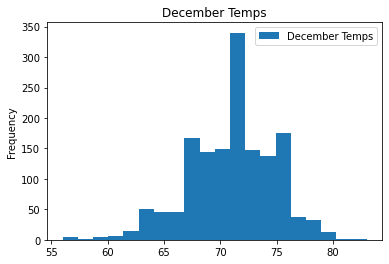

In [88]:
december_df.plot.hist(bins=20, title= 'December Temps')
